In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib  import dates

from sklearn import linear_model

%matplotlib inline
import seaborn as sns
sns.set()

import itertools

In [87]:
pd.set_option('display.max_columns', 100000)
pd.set_option('display.max_rows', 100000)

# Loading of Data

In [88]:
path='C:/Users/Carlos Ivan/Documents/OneDrive - KU Leuven/Modern Data Analytics/Project/'

In [89]:
df=pd.read_csv(path+"HISTORICAL_BONDS.csv",header=0)
df

company_name  \
0                                        2i rete gas   
1                                        2i rete gas   
2                                        2i rete gas   
3                                        2i rete gas   
4                                                A2A   
5                                                A2A   
6                                                A2A   
7                                                A2A   
8                                                A2A   
9                                                ABB   
10                                       Abb Finance   
11                                               ABB   
12                          Abertis Infraestructuras   
13                          Abertis Infraestructuras   
14                          Abertis Infraestructuras   
15                          Abertis Infraestructuras   
16                          Abertis Infraestructuras   
17                          Abertis Infraestructuras   
18                                              Acea   
19                                              Acea   
20                                              Acea   
21                                              Acea   
22                                         Achmea BV   
23                                            Adecco   
24                                            Adecco   
25                                             Aegon   
26                                             Aegon   
27                                 Aeroporti di Roma   
28                                 Aeroporti di Roma   
29                                Aeroports de Paris   
30                                Aeroports de Paris   
31                                Aeroports de Paris   
32                                Aeroports de Paris   
33                                       Air Liquide   
34                               Air Liquide Finance   
35                                       Air Liquide   
36                               Air Liquide Finance   
37                               Air Liquide Finance   
38                               Air Liquide Finance   
39                               Air Liquide Finance   
40                               Air Liquide Finance   
41                               Air Liquide Finance   
42                               Air Liquide Finance   
43                                       Air Liquide   
44                                       Air Liquide   
45                                       Air Liquide   
46                                            Airbus   
47                                            Airbus   
48                                            Airbus   
49                                            Airbus   
50                                        Akzo Nobel   
51                                        Akzo Nobel   
52                                        Akzo Nobel   
53                                         Alliander   
54                                         Alliander   
55                                         Alliander   
56                                           Allianz   
57                           Allianz Finance II B.V.   
58                                           Allianz   
59                           Allianz Finance II B.V.   
60                               Alstria Office REIT   
61                               Alstria Office REIT   
62                                  Amadeus IT Group   
63                                  Amadeus IT Group   
64                                  Amadeus IT Group   
65                              Anheuser-Busch InBev   
66                              Anheuser-Busch InBev   
67                              Anheuser-Busch InBev   
68                              Anheuser-Busch InBev   
69                              Anheuser-Busch InBev   
70                              Anheuser-Busch InBev   
71      

In [90]:
df_sm=df[["industry","country","bond_types","ISIN","total_bond_amount","coupon_rate","nominal_amount","maturity_date","year_created"]]
df_sm.shape

(2083, 9)

There are 2,083 bonds

In [91]:
df_sm.dtypes

industry             object
country              object
bond_types           object
ISIN                 object
total_bond_amount    object
coupon_rate          object
nominal_amount       object
maturity_date        object
year_created          int64
dtype: object

In [92]:
df_sm.describe(exclude=np.number)

industry country        bond_types          ISIN total_bond_amount  \
count      2083    2083              1206          2083              2083   
unique       20      26                15          2055               209   
top       Power  France  Senior Unsecured  FR0014000C08   500,000,000 EUR   
freq        346     562               922            10               587   

       coupon_rate nominal_amount maturity_date  
count         2083           2083          2083  
unique         201              9          1611  
top             1%      1,000 EUR      7apr2025  
freq           118           1119             6

In [93]:
1206/2083

0.5789726356216994

Only 58% of the bonds have assigned a "bond type". Since this characteristic is of importance to detect if the bank has helped or not the green economy, we will only use in the analysis bonds with a non-missing bond type.

In [94]:
#Imputation of data for bonds
df_sm=df_sm[~pd.isnull(df_sm["bond_types"])]
df_sm.shape

(1206, 9)

Number of bonds by industry

In [95]:
df_sm["industry"].value_counts()

Power                                  182
Engineering industry                   145
Construction and development           119
Financial institutions                 115
Oil and gas                            107
Communication                          102
Chemical and petrochemical industry     83
Transportation                          79
Food industry                           63
Healthсare                              48
Information and High Technologies       40
Public utilities                        34
Other sectors                           24
Light industry                          20
Media and Entertainment                 13
Trade and retail                        11
Mining industry                          8
Pulp, paper and wood industries          6
Ferrous metals                           4
Non-ferrous metals                       3
Name: industry, dtype: int64

We group industries with low observations and add them into the "other sectors" group. The purpose of this is to not draw assumptions from them in the correspondence analysis that are only based in a couple of observations

In [96]:
df_sm["industry"][df_sm["industry"].isin(["Pulp, paper and wood industries", "Ferrous metals", "Mining industry","Non-ferrous metals"])]="Other sectors"

In [97]:
df_sm["industry"].value_counts()

Power                                  182
Engineering industry                   145
Construction and development           119
Financial institutions                 115
Oil and gas                            107
Communication                          102
Chemical and petrochemical industry     83
Transportation                          79
Food industry                           63
Healthсare                              48
Other sectors                           45
Information and High Technologies       40
Public utilities                        34
Light industry                          20
Media and Entertainment                 13
Trade and retail                        11
Name: industry, dtype: int64

We group bonds too

In [98]:
df_sm["bond_types"].value_counts()

Senior Unsecured                                    922
Green bonds, Senior Unsecured                        79
Zero-coupon bonds, Senior Unsecured                  45
Floating rate                                        39
Zero-coupon bonds                                    39
Green bonds                                          32
Senior Secured                                       21
Senior Unsecured, Floating rate                      11
Foreign bonds                                         6
Green bonds, Zero-coupon bonds, Senior Unsecured      4
Zero-coupon bonds, Senior Secured                     2
Green bonds, Senior Secured                           2
Foreign bonds, Senior Unsecured                       2
Foreign bonds, Floating rate                          1
Securitization                                        1
Name: bond_types, dtype: int64

In [99]:
#Grouping of bond types
auxgreen=["Green" in  aux for aux in df_sm["bond_types"]]
df_sm.iloc[auxgreen,2]="Green bonds"

auxzero=["Zero" in  aux for aux in df_sm["bond_types"]]
df_sm.iloc[auxzero,2]="Zero-coupon bonds"

auxforeign=["Foreign" in  aux for aux in df_sm["bond_types"]]
df_sm.iloc[auxforeign,2]="Foreign bonds"

auxfloating=["Floating" in  aux for aux in df_sm["bond_types"]]
df_sm.iloc[auxfloating,2]="Floating rate"

df_sm["bond_types"][df_sm["bond_types"].isin(["Senior Secured", "Floating rate", "Foreign bonds","Securitization"])]="Others"

C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
df_sm["bond_types"].value_counts()

Senior Unsecured     922
Green bonds          117
Zero-coupon bonds     86
Others                81
Name: bond_types, dtype: int64

We visualize the frequency of each of the bond type by country, for descriptive purposes

In [101]:
crosst=pd.crosstab(df_sm["country"],df_sm["bond_types"])
crosst

bond_types      Green bonds  Others  Senior Unsecured  Zero-coupon bonds
country                                                                 
Austria                   3       0                20                  2
Belgium                   1       4                 1                  0
Bermuda                   0       0                 1                  0
Czech Republic            1       0                 6                  0
Denmark                   0       0                 6                  0
Estonia                   0       0                 1                  0
Finland                   4       0                26                  1
France                   20      16                83                 26
Germany                  18      16               258                 25
Hong Kong                 0       0                 4                  0
Ireland                   1       1                23                  0
Italy                    24       1               100                  6
Lithuania                 2       0                 1                  0
Luxembourg                0       1                 9                  1
Netherlands              24      17               119                  8
Portugal                  2       0                 5                  1
Romania                   1       0                 0                  0
Slovakia                  0       0                 3                  0
South Africa              0       0                 4                  0
Spain                    14      11                95                  1
Sweden                    0       3                 5                  0
Switzerland               1       4                55                  7
USA                       1       3                37                  3
United Kingdom            0       4                60                  5

Number of bonds per country. We will group countries which are similar and which have a very small number of bonds.

In [102]:
df_sm["country"].value_counts() 

Germany           317
Netherlands       168
France            145
Italy             131
Spain             121
United Kingdom     69
Switzerland        67
USA                44
Finland            31
Austria            25
Ireland            25
Luxembourg         11
Sweden              8
Portugal            8
Czech Republic      7
Belgium             6
Denmark             6
South Africa        4
Hong Kong           4
Slovakia            3
Lithuania           3
Bermuda             1
Estonia             1
Romania             1
Name: country, dtype: int64

In [103]:
df_sm["country"][df_sm["country"].isin(["USA","Hong Kong", "South Africa", "Bermuda"])]="Non_EU"
df_sm["country"][df_sm["country"].isin(["Sweden", "Denmark"])]="Sweden_Denmark"
df_sm["country"][df_sm["country"].isin(["Romania", "Slovakia","Czech Republic"])]="CZ_SK_RO"
df_sm["country"][df_sm["country"].isin(["Lithuania", "Estonia"])]="LT_EE"
df_sm["country"][df_sm["country"].isin(["Belgium","Luxembourg"])]="BE_LU"

C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [104]:
df_sm["country"].value_counts()

Germany           317
Netherlands       168
France            145
Italy             131
Spain             121
United Kingdom     69
Switzerland        67
Non_EU             53
Finland            31
Austria            25
Ireland            25
BE_LU              17
Sweden_Denmark     14
CZ_SK_RO           11
Portugal            8
LT_EE               4
Name: country, dtype: int64

# Descriptive Analysis: Correspondence Analysis

We analyse the relationships between industry, country and type of a bond

In [105]:
#%pip install mca

In [106]:
import mca

In [107]:
df_dummies=pd.get_dummies(df_sm[["industry","country","bond_types"]], prefix=None, prefix_sep='_')

In [108]:
print(df_dummies.shape)
df_dummies.head(3)

(1206, 36)


industry_Chemical and petrochemical industry  industry_Communication  \
1                                             0                       0   
3                                             0                       0   
6                                             0                       0   

   industry_Construction and development  industry_Engineering industry  \
1                                      0                              0   
3                                      0                              0   
6                                      0                              0   

   industry_Financial institutions  industry_Food industry  \
1                                0                       0   
3                                0                       0   
6                                0                       0   

   industry_Healthсare  industry_Information and High Technologies  \
1                    0                                           0   
3                    0                                           0   
6                    0                                           0   

   industry_Light industry  industry_Media and Entertainment  \
1                        0                                 0   
3                        0                                 0   
6                        0                                 0   

   industry_Oil and gas  industry_Other sectors  industry_Power  \
1                     0                       0               0   
3                     0                       0               0   
6                     0                       0               1   

   industry_Public utilities  industry_Trade and retail  \
1                          1                          0   
3                          1                          0   
6                          0                          0   

   industry_Transportation  country_Austria  country_BE_LU  country_CZ_SK_RO  \
1                        0                0              0                 0   
3                        0                0              0                 0   
6                        0                0              0                 0   

   country_Finland  country_France  country_Germany  country_Ireland  \
1                0               0                0                0   
3                0               0                0                0   
6                0               0                0                0   

   country_Italy  country_LT_EE  country_Netherlands  country_Non_EU  \
1              1              0                    0               0   
3              1              0                    0               0   
6              1              0                    0               0   

   country_Portugal  country_Spain  country_Sweden_Denmark  \
1                 0              0                       0   
3                 0              0                       0   
6                 0              0                       0   

   country_Switzerland  country_United Kingdom  bond_types_Green bonds  \
1                    0                       0                       0   
3                    0                       0                       0   
6                    0                       0                       0   

   bond_types_Others  bond_types_Senior Unsecured  \
1                  0                            1   
3                  0                            1   
6                  0                            1   

   bond_types_Zero-coupon bonds  
1                             0  
3                             0  
6                             0

In [109]:
mca_ind = mca.MCA(df_dummies, benzecri=True)

In [110]:
print(len(mca_ind.L)) #One factor for level
mca_ind.L  #Eigenvalues/principal inertias of each of the factors

33


array([0.3207515 , 0.23278978, 0.22631755, 0.21719662, 0.19447777,
       0.19188924, 0.16429584, 0.1502701 , 0.14970527, 0.12962739,
       0.12716017, 0.11311926, 0.10796008, 0.10390522, 0.10143871,
       0.09998701, 0.09745013, 0.09208797, 0.09178948, 0.08713953,
       0.08576074, 0.07878654, 0.07071184, 0.06665637, 0.05928371,
       0.05665613, 0.0478945 , 0.04145119, 0.03537978, 0.02829117,
       0.02356498, 0.01994727, 0.01366035])

Factors of each observation

In [111]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=df_dummies.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ind.fs_r(N=2).T
table3.loc[cos,   :] = mca_ind.cos_r(N=2).T
table3.loc[cont,  :] = mca_ind.cont_r(N=2).T * 1000

np.round(table3.astype(float), 2)

1     3     6     10    11    20    21    22    24    \
Factor score         1 -0.58 -0.58 -0.95  0.22  0.66 -0.95 -0.95  0.13  0.78   
                     2 -0.47 -0.47 -0.05 -0.01  0.50 -0.05 -0.05  0.10  1.25   
Squared cosines      1  0.08  0.08  0.55  0.03  0.18  0.55  0.55  0.01  0.11   
                     2  0.05  0.05  0.00  0.00  0.11  0.00  0.00  0.00  0.27   
Contributions x 1000 1  0.87  0.87  2.33  0.13  1.13  2.33  2.33  0.04  1.58   
                     2  0.78  0.78  0.01  0.00  0.90  0.01  0.01  0.04  5.55   

                        26    28    46    47    48    49    51    52    55    \
Factor score         1  0.13 -0.63  0.22  0.22  0.22  0.22  0.31  0.31 -1.20   
                     2  0.10 -0.28 -0.01 -0.01 -0.01 -0.01 -0.19 -0.19  0.57   
Squared cosines      1  0.01  0.14  0.03  0.03  0.03  0.03  0.05  0.05  0.50   
                     2  0.00  0.03  0.00  0.00  0.00  0.00  0.02  0.02  0.11   
Contributions x 1000 1  0.04  1.02  0.13  0.13  0.13  0.13  0.25  0.25  3.74   
                     2  0.04  0.29  0.00  0.00  0.00  0.00  0.13  0.13  1.16   

                        59    62    63    64    65    68    78    92    93    \
Factor score         1  0.20  0.03  0.03  0.10  0.84  0.84  0.84  0.19  0.19   
                     2  0.37 -0.49 -0.49 -0.23  1.38  1.38  1.38 -0.08 -0.08   
Squared cosines      1  0.01  0.00  0.00  0.00  0.06  0.06  0.06  0.01  0.01   
                     2  0.04  0.06  0.06  0.01  0.16  0.16  0.16  0.00  0.00   
Contributions x 1000 1  0.11  0.00  0.00  0.03  1.84  1.84  1.84  0.10  0.10   
                     2  0.48  0.86  0.86  0.18  6.77  6.77  6.77  0.02  0.02   

                        94    95    96    98    100   110   112   113   116   \
Factor score         1  0.19  0.19 -0.31  0.21 -0.63 -0.46 -0.63 -0.63 -0.63   
                     2 -0.08 -0.08 -0.18 -0.05 -0.28  0.06 -0.28 -0.28 -0.28   
Squared cosines      1  0.01  0.01  0.06  0.04  0.14  0.06  0.14  0.14  0.14   
                     2  0.00  0.00  0.02  0.00  0.03  0.00  0.03  0.03  0.03   
Contributions x 1000 1  0.10  0.10  0.24  0.12  1.02  0.55  1.02  1.02  1.02   
                     2  0.02  0.02  0.11  0.01  0.29  0.01  0.29  0.29  0.29   

                        117   118   119   120   121   122   123   127   129   \
Factor score         1 -0.63 -0.63 -0.63 -0.63  0.11  0.50  0.42  0.42  0.42   
                     2 -0.28 -0.28 -0.28 -0.28  0.24 -0.19 -0.46 -0.46 -0.46   
Squared cosines      1  0.14  0.14  0.14  0.14  0.01  0.08  0.09  0.09  0.09   
                     2  0.03  0.03  0.03  0.03  0.04  0.01  0.11  0.11  0.11   
Contributions x 1000 1  1.02  1.02  1.02  1.02  0.03  0.64  0.46  0.46  0.46   
                     2  0.29  0.29  0.29  0.29  0.21  0.13  0.74  0.74  0.74   

                        131   132   133   134   135   136   141   142   144   \
Factor score         1  0.42  0.42  0.48  0.48  0.48  0.48  0.33  0.33  0.33   
                     2 -0.46 -0.46 -0.72 -0.72 -0.72 -0.72 -0.27 -0.27 -0.27   
Squared cosines      1  0.09  0.09  0.02  0.02  0.02  0.02  0.08  0.08  0.08   
                     2  0.11  0.11  0.05  0.05  0.05  0.05  0.06  0.06  0.06   
Contributions x 1000 1  0.46  0.46  0.60  0.60  0.60  0.60  0.28  0.28  0.28   
                     2  0.74  0.74  1.83  1.83  1.83  1.83  0.26  0.26  0.26   

                        146   147   149   150   152   153   154   156   170   \
Factor score         1  0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.69   
                     2 -0.27 -0.27 -0.27 -0.27 -0.27 -0.27 -0.27 -0.27  0.24   
Squared cosines      1  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.12   
                     2  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.01   
Contributions x 1000 1  0.28  0.28  0.28  0.28  0.28  0.28  0.28  0.28  1.22   
                     2  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.20   

                        174   176   177   180   184   189   190   191   196   \
Factor score     

Factors of each dummy variable

In [112]:
table4 = pd.DataFrame(columns=df_dummies.columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
table4.loc[fs,  :] = mca_ind.fs_c(N=2).T
table4.loc[cos, :] = mca_ind.cos_c(N=2).T
table4.loc[cont,:] = mca_ind.cont_c(N=2).T * 1000

print(table4.shape)
np.round(table4.astype(float), 2)


(6, 36)


industry_Chemical and petrochemical industry  \
Factor score         1                                          0.61   
                     2                                         -0.53   
Squared cosines      1                                          0.09   
                     2                                          0.06   
Contributions x 1000 1                                         26.68   
                     2                                         27.69   

                        industry_Communication  \
Factor score         1                   -0.12   
                     2                   -0.71   
Squared cosines      1                    0.00   
                     2                    0.14   
Contributions x 1000 1                    1.34   
                     2                   60.97   

                        industry_Construction and development  \
Factor score         1                                   0.13   
                     2                                   0.34   
Squared cosines      1                                   0.01   
                     2                                   0.04   
Contributions x 1000 1                                   1.81   
                     2                                  15.88   

                        industry_Engineering industry  \
Factor score         1                           0.40   
                     2                          -0.14   
Squared cosines      1                           0.07   
                     2                           0.01   
Contributions x 1000 1                          20.05   
                     2                           3.34   

                        industry_Financial institutions  \
Factor score         1                             0.19   
                     2                             0.09   
Squared cosines      1                             0.01   
                     2                             0.00   
Contributions x 1000 1                             3.70   
                     2                             1.13   

                        industry_Food industry  industry_Healthсare  \
Factor score         1                    0.84                 0.76   
                     2                    1.10                 0.24   
Squared cosines      1                    0.12                 0.08   
                     2                    0.20                 0.01   
Contributions x 1000 1                   38.20                23.81   
                     2                   90.39                 3.19   

                        industry_Information and High Technologies  \
Factor score         1                                        0.33   
                     2                                       -0.30   
Squared cosines      1                                        0.01   
                     2                                        0.01   
Contributions x 1000 1                                        3.86   
                     2                                        4.14   

                        industry_Light industry  \
Factor score         1                     0.46   
                     2                     0.56   
Squared cosines      1                     0.01   
                     2                     0.02   
Contributions x 1000 1                     3.62   
                     2                     7.37   

                        industry_Media and Entertainment  \
Factor score         1                              0.74   
                     2                             -1.08   
Squared cosines      1                              0.02   
                     2                              0.04   
Contributions x 1000 1                              6.21   
                     2                             17.98   

                        industry_Oil and gas  industry_Other sectors  \
Factor score         1                  0.04              

In [113]:
Factors=table4.iloc[:2,:].T
Factors.columns=["Factor_1","Factor_2"]
Factors

Factor_1   Factor_2
industry_Chemical and petrochemical industry   0.610791  -0.530074
industry_Communication                        -0.123355  -0.709542
industry_Construction and development          0.132924   0.335301
industry_Engineering industry                  0.400567  -0.139184
industry_Financial institutions                0.193295  0.0911403
industry_Food industry                         0.838889     1.0993
industry_Healthсare                            0.758654   0.236551
industry_Information and High Technologies     0.334755  -0.295283
industry_Light industry                        0.458381   0.557219
industry_Media and Entertainment               0.744313   -1.07937
industry_Oil and gas                          0.0394232  -0.737756
industry_Other sectors                         0.675016    1.44072
industry_Power                                 -1.27349   0.355191
industry_Public utilities                     -0.434626  -0.519728
industry_Trade and retail                     -0.121208  -0.179081
industry_Transportation                       -0.537349  -0.134675
country_Austria                              -0.0363928  -0.781311
country_BE_LU                                  0.594649    1.25522
country_CZ_SK_RO                              -0.455082  -0.145441
country_Finland                               -0.154708   0.461607
country_France                               -0.0668438   0.579055
country_Germany                                0.236016  -0.276811
country_Ireland                               -0.582158   0.260349
country_Italy                                  -1.00801  -0.308002
country_LT_EE                                  -2.64505    1.14368
country_Netherlands                          -0.0123723   0.282168
country_Non_EU                                  0.61291  -0.441755
country_Portugal                               -2.08136   0.914705
country_Spain                                 -0.384502  -0.587139
country_Sweden_Denmark                         0.497273   0.394273
country_Switzerland                            0.990545    1.35848
country_United Kingdom                         0.755115  -0.554605
bond_types_Green bonds                         -1.45759   0.570949
bond_types_Others                              0.489941   0.560217
bond_types_Senior Unsecured                    0.115363   -0.15921
bond_types_Zero-coupon bonds                   0.284742   0.402475

In [114]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

Plot of the first 2 factors of the correspondence analysis, for each of the dummy variables

In [115]:
labels=['Chem/Petro','Commun.', 'Construction','    Engineering', 'Financial','   Food', 'Healthсare',
       'Technology', '    Light','Entertainment', '        Oil/Gas',' Others', 'Power', 'Public utilities',
       'Trade', 'Trans.','AT', 'BE-LU', '    CZ-SK-RO','FI', 'FR', 'DE','IE', 'IT', 'LT-EE', 'NL', '  Non-EU',
       'PT', 'ES', '    SE-DK','CH', '            UK','Green bonds', '      Others','Sr. Unsec.', 'Zero-coup.']

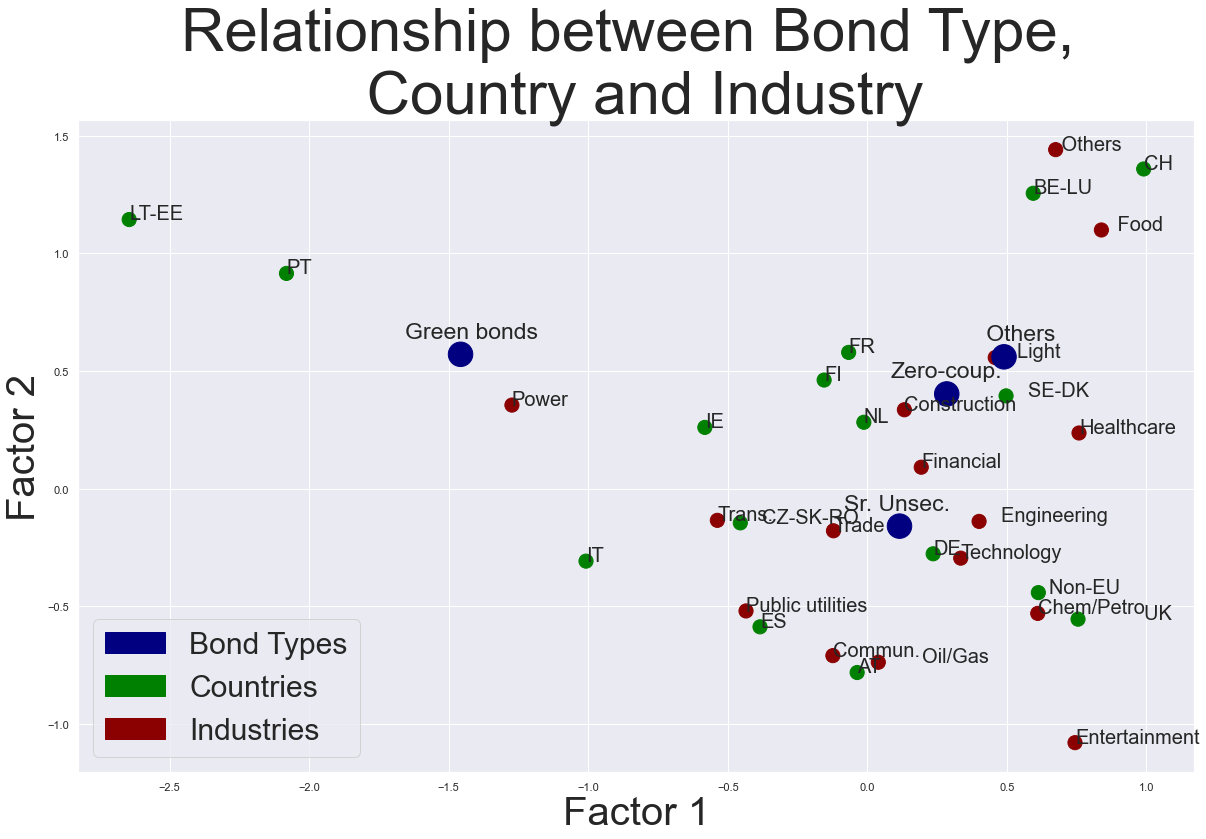

In [116]:
CA_plot, ax=plt.subplots(figsize=(20, 12))
ax.scatter(Factors["Factor_1"], Factors["Factor_2"], s=[200]*16+[200]*16+[600]*4, color=["darkred"]*16+["green"]*16+["navy"]*4) # c=Df_PCA_Biplot["Compound"], vmin=-0.6, vmax=0.6,cmap = matplotlib.cm.get_cmap('jet_r')

ax.set_ylabel("Factor 2",size=40)
ax.set_xlabel("Factor 1",size=40)
ax.set_title("Relationship between Bond Type, \n Country and Industry",size=60)

for i, txt in enumerate(Factors.index):
    if i>=32:
        ax.annotate(labels[i], (Factors["Factor_1"][i]-0.2, Factors["Factor_2"][i]+0.07),size=23)
    else:
        ax.annotate(labels[i], (Factors["Factor_1"][i], Factors["Factor_2"][i]),size=20)
        
Bond_patch = mpatches.Patch(color='navy', label='Bond Types')
Country_patch = mpatches.Patch(color='green', label='Countries')
Industry_patch = mpatches.Patch(color='darkred', label='Industries')
ax.legend(handles=[Bond_patch,Country_patch,Industry_patch], fontsize=30,loc="lower left")

#CA_plot.show()

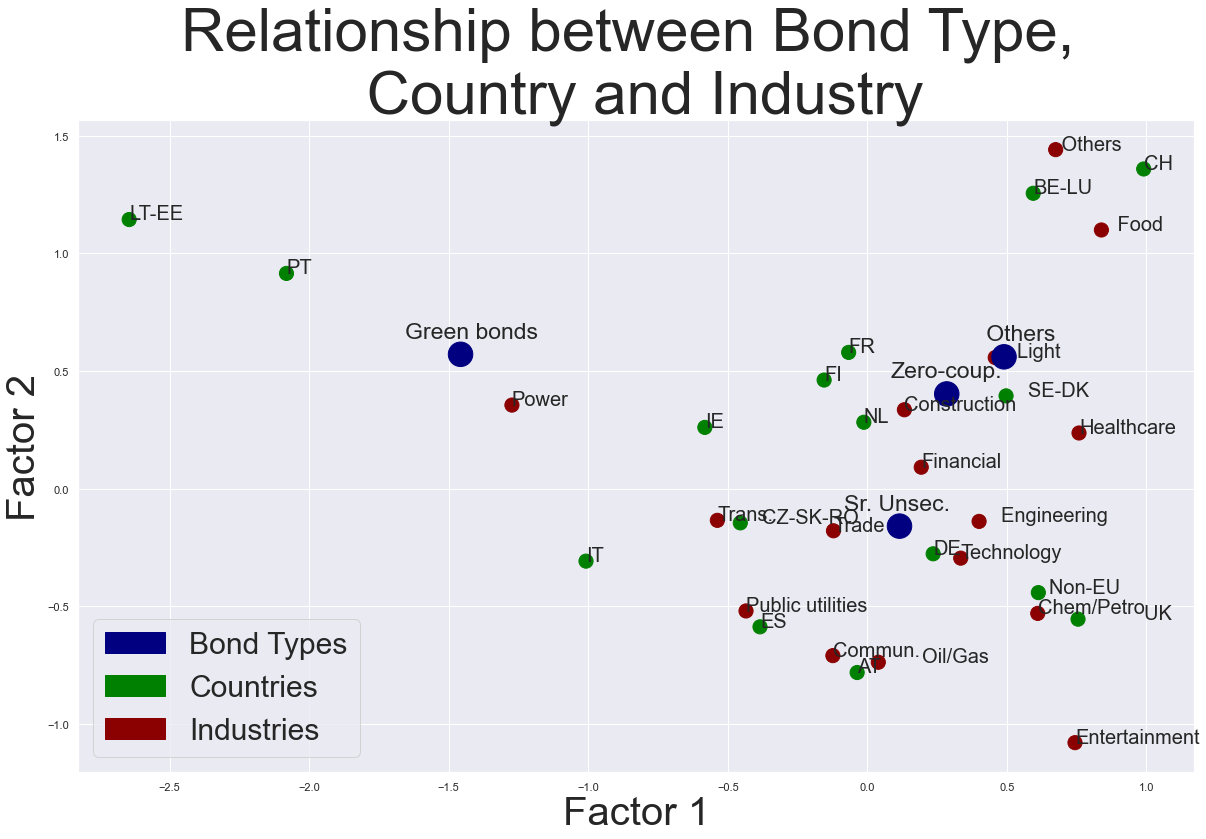

In [117]:
CA_plot

Portugal, Lithuania-Estonia, Italy and Ireland, are the countries most related to green bonds.

The Power industry is extremely related to these bonds too.

# Data Pre-processing

## Data Cleaning

Here we will:

* Change the format of numeric data
* Add a rate to floating rate bonds. We will add the mean of the rates
* Change the format of date columns and add year columns


Change format of numeric data

In [118]:
#df_sm["total_bond_amount"]=df_sm["total_bond_amount"].str.replace('EUR','').str.replace(',','').astype(float)

In [119]:
df_sm["nominal_amount"]=df_sm["nominal_amount"].str.replace('EUR','').str.replace(',','').astype(float)

In [120]:
df_sm["coupon_rate"]=df_sm["coupon_rate"].str.replace('%','').str.replace('FRN','nan').astype(float)

Add a rate to floating rate bonds (mean)

In [121]:
df_sm["coupon_rate"][pd.isnull(df_sm["coupon_rate"])]=df_sm["coupon_rate"].mean()

C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Change format of date columns and add year columns

In [122]:
df_sm['maturity_date']=pd.to_datetime(df_sm['maturity_date'])

In [123]:
df_sm['maturity_year']=df_sm['maturity_date'].dt.year

In [124]:
df_sm['year_created']=df_sm['year_created'].astype(int)

In [125]:
df_sm[['maturity_year','year_created']].describe()

maturity_year  year_created
count    1206.000000   1206.000000
mean     2026.176617   2018.504146
std         4.143222      1.475521
min      2018.000000   2017.000000
25%      2023.000000   2017.000000
50%      2026.000000   2018.000000
75%      2028.000000   2020.000000
max      2049.000000   2021.000000

We will now obtain a "surplus" for the company for each of the bond. For that, we obtain the value of all the interest and nominal value that the company has to pay to the bank, at the year that the bond was purchased. We then rest this amount to the total bond amount. In this way we will obtain the "surplus" of the deal for the company's side. 

After that, since different bond could have different issuing dates, we will take all the surplus values to the 2021 year. In this way we can make the surplus of the bonds comparable.

For making this process, we assign to floating rate bonds the average rate, and we considered a fix inlation rate of the one present in the euro area at the time this notebook was done, which is 1.6%.

## Annuities and present value functions

In [126]:
def startvalue_zerobond(yr_start,yr_end,inflation,facevalue):
    diffyears=yr_end-yr_start
    totalvalue_atstart=facevalue/((1+inflation)**diffyears)
    return totalvalue_atstart

def startvalue_interest(yr_start,yr_end,inflation,interest,bondcost):
    diffyears=yr_end-yr_start
    totalvalue_atstart=((bondcost*interest)/(1+inflation))*((1-(1+inflation)**(-diffyears))/(1-(1+inflation)**(-1)))
    return totalvalue_atstart

def startvalue_completebond(yr_start,yr_end,inflation,facevalue,interest,bondcost):
    zerobond_atstart=startvalue_zerobond(yr_start,yr_end,inflation,facevalue)
    interest_atstart=startvalue_interest(yr_start,yr_end,inflation,interest,bondcost)
    all_value_atstart=interest_atstart+zerobond_atstart
    return all_value_atstart

def fromstart_topresent(yr_start,yr_present,value,inflation):
    diffyears=yr_present-yr_start
    presentvalue=value*(1+inflation)**diffyears
    return presentvalue

In [127]:
df_sm.head(3)

industry country        bond_types          ISIN total_bond_amount  \
1  Public utilities   Italy  Senior Unsecured  XS1088274672   600,000,000 EUR   
3  Public utilities   Italy  Senior Unsecured  XS1571982468   435,000,000 EUR   
6             Power   Italy  Senior Unsecured  XS1004874621   500,000,000 EUR   

   coupon_rate  nominal_amount maturity_date  year_created  maturity_year  
1        3.000          1000.0    2024-07-16          2017           2024  
3        1.750          1000.0    2026-08-28          2017           2026  
6        3.625          1000.0    2022-01-13          2017           2022

## Creation of surplus at time 2021

Getting the start value of contributions to the company for the bank. We suppose an inflation of 1.6%, and that the bank bought the bond at the nominal value.

In [128]:
df_sm['Payment_atstartvalue']=startvalue_completebond(df_sm['year_created'],df_sm['maturity_year'],0.016,df_sm['nominal_amount'],
                        df_sm['coupon_rate']/100,df_sm['nominal_amount'])

Getting the surplus at time that the bond was purchased

In [129]:
df_sm['surplus_company']=df_sm['nominal_amount']-df_sm['Payment_atstartvalue']

Getting the surplus value at time 2021

In [130]:
df_sm['surplus_company_21']= fromstart_topresent(df_sm['year_created'],2021, df_sm['surplus_company']   ,0.016 )           

In [131]:
df_sm['surplus_company_21'].describe()

count     1206.000000
mean       414.839976
std       3919.459912
min     -45020.078751
25%        -30.290693
50%         37.237203
75%        108.668277
max      18999.848463
Name: surplus_company_21, dtype: float64

In [132]:
df_sm.sort_values(by='surplus_company_21')

industry         country         bond_types  \
1308                 Engineering industry         Germany   Senior Unsecured   
112                        Transportation           Italy   Senior Unsecured   
1590               Financial institutions     Netherlands             Others   
1307                 Engineering industry         Germany   Senior Unsecured   
644                           Oil and gas         Austria   Senior Unsecured   
854                                 Power     Netherlands   Senior Unsecured   
1356         Construction and development           Spain   Senior Unsecured   
839                         Communication           Spain   Senior Unsecured   
835                         Communication           Spain   Senior Unsecured   
442                      Public utilities           Spain   Senior Unsecured   
1426                 Engineering industry         Germany   Senior Unsecured   
399                           Oil and gas         Austria   Senior Unsecured   
443                      Public utilities           Spain   Senior Unsecured   
1609                        Food industry  United Kingdom             Others   
708                  Engineering industry         Germany   Senior Unsecured   
1673                       Transportation          France   Senior Unsecured   
790                        Transportation          France   Senior Unsecured   
878                           Oil and gas          France   Senior Unsecured   
177                         Communication           Spain   Senior Unsecured   
928                           Oil and gas         Germany   Senior Unsecured   
791                        Transportation          France   Senior Unsecured   
789                        Transportation          France   Senior Unsecured   
836                         Communication           Spain   Senior Unsecured   
331                                 Power          France   Senior Unsecured   
1217               Financial institutions     Netherlands   Senior Unsecured   
822                         Communication           Italy   Senior Unsecured   
929                           Oil and gas         Germany   Senior Unsecured   
1306                 Engineering industry         Germany   Senior Unsecured   
445                      Public utilities           Spain   Senior Unsecured   
1738    Information and High Technologies           Spain   Senior Unsecured   
879                           Oil and gas          France   Senior Unsecured   
1905                     Trade and retail           Spain             Others   
1468         Construction and development          France        Green bonds   
503                                 Power           Spain   Senior Unsecured   
845                         Communication           Spain   Senior Unsecured   
435                      Public utilities           Spain   Senior Unsecured   
505                                 Power           Spain   Senior Unsecured   
655                         Communication          France   Senior Unsecured   
1427                 Engineering industry         Germany   Senior Unsecured   
373                                 Power          France        Green bonds   
499          Construction and development          France   Senior Unsecured   
1746                 Engineering industry     Netherlands             Others   
1815               Financial institutions          Non_EU   Senior Unsecured   
1603               Financial institutions          Non_EU   Senior Unsecured   
1792                        Communication           Spain   Senior Unsecured   
1628               Financial institutions     Netherlands             Others   
1589               Financial institutions     Netherlands             Others   
1907         Construction and development         Austria   Senior Unsecured   
1146               Financial institutions     Netherlands   Senior Unsecured   
1355         Construction and dev

# Distribution of green bonds compared to the rest of them

Distribution of the surplus at 2021 

In [133]:
df_sm['surplus_company_21'].describe()

count     1206.000000
mean       414.839976
std       3919.459912
min     -45020.078751
25%        -30.290693
50%         37.237203
75%        108.668277
max      18999.848463
Name: surplus_company_21, dtype: float64

C:\Home\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surplus_company_21', ylabel='Density'>

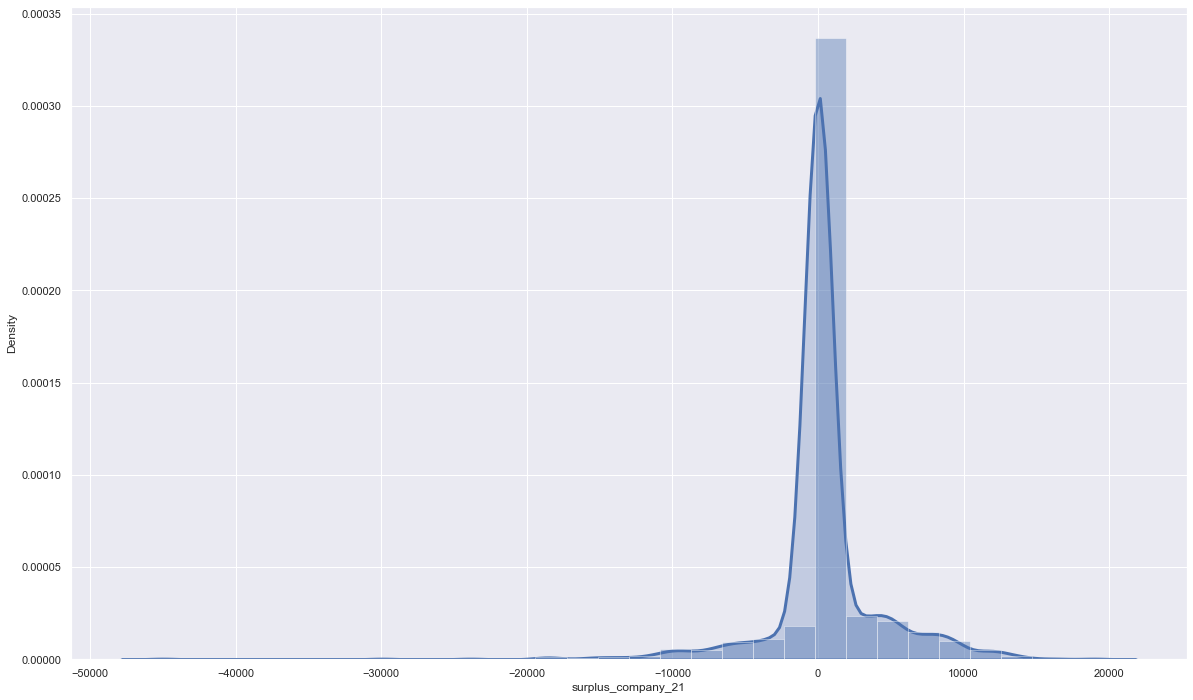

In [134]:
plt.subplots(figsize=(20, 12))
sns.distplot(df_sm['surplus_company_21'], hist = True, kde = True,bins=30,
                 kde_kws = {'shade': True, 'linewidth': 3})#, label = bond_types)

Distribution by bond type

<AxesSubplot:xlabel='bond_types', ylabel='surplus_company_21'>

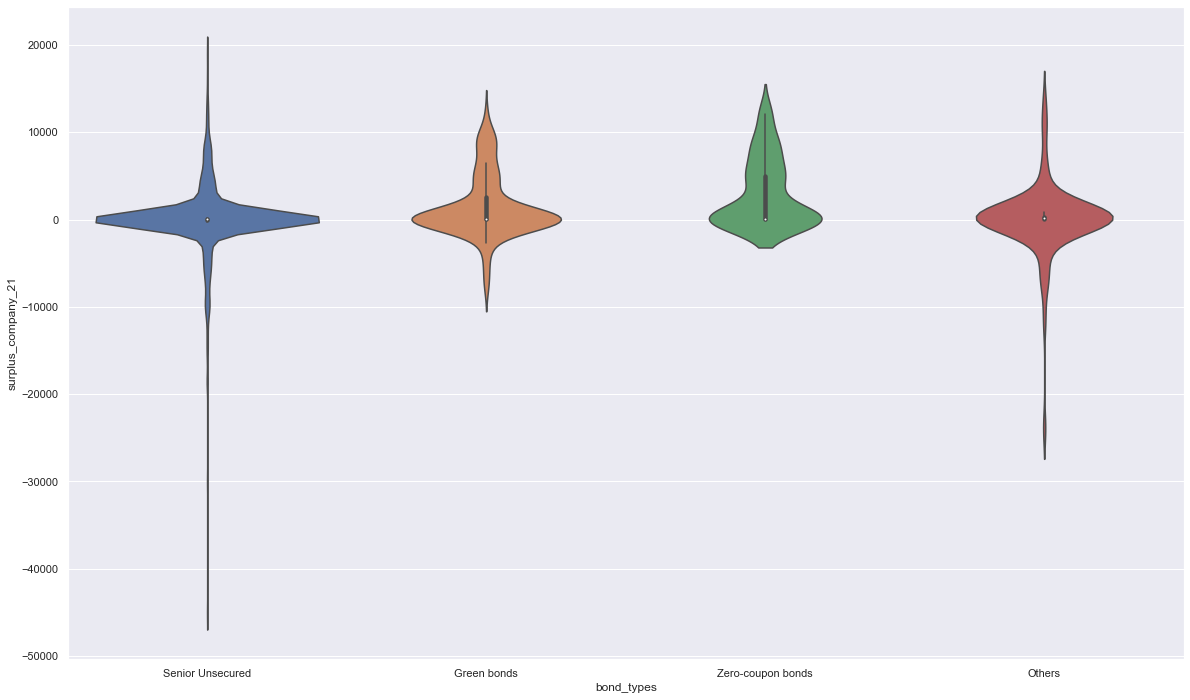

In [135]:
plt.subplots(figsize=(20, 12))
sns.violinplot(x ="bond_types", y ="surplus_company_21", data = df_sm)# ,hue ="region", style ="event"

Small signs that the bank could be supporting the green bonds so far. The bond that seems to be supported the most is the Zero-coupon bond.

In [136]:
df_sm["Ind_Green"]="No"
df_sm["Ind_Green"][df_sm["bond_types"]=="Green bonds"]="Yes"
df_sm["Ind_Green"].value_counts()

C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No     1089
Yes     117
Name: Ind_Green, dtype: int64

Distribution of surplus by industry and bond type

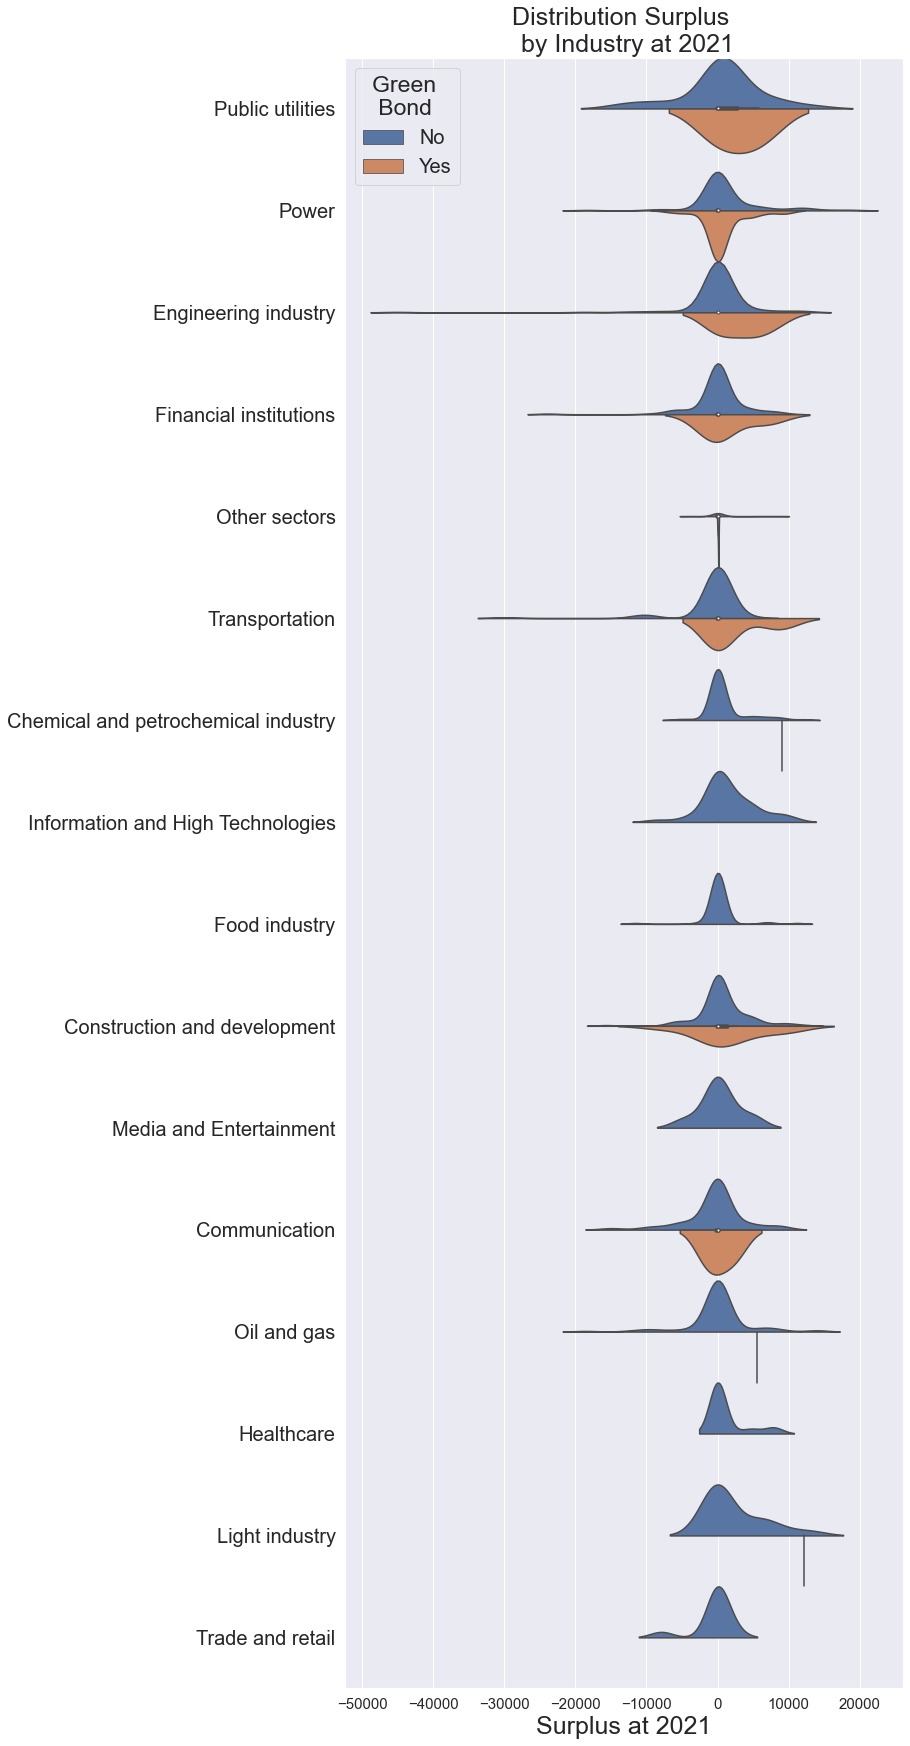

In [137]:
plt.subplots(figsize=(10, 30))
sns.violinplot(y ="industry", x ="surplus_company_21", data = df_sm,width=1,dodge=True, style ="event",hue ="Ind_Green",
               split=True)# 
plt.legend(fontsize=20,title="Green \n Bond",title_fontsize=23, loc="upper left")
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.xlabel("Surplus at 2021",size=25)
plt.ylabel("")
plt.title("Distribution Surplus \n by Industry at 2021", size=25);

Surplus in engineering seems bigger for green bonds than the rest, but the sample of green bonds (5) is too small in those industries for making strong conclussions.

In [138]:
pd.crosstab(df_sm["Ind_Green"],df_sm["industry"]).T

Ind_Green                             No  Yes
industry                                     
Chemical and petrochemical industry   82    1
Communication                         99    3
Construction and development         108   11
Engineering industry                 140    5
Financial institutions               108    7
Food industry                         63    0
Healthсare                            48    0
Information and High Technologies     40    0
Light industry                        19    1
Media and Entertainment               13    0
Oil and gas                          106    1
Other sectors                         41    4
Power                                111   71
Public utilities                      32    2
Trade and retail                      11    0
Transportation                        68   11

# Lasso

We already know that the number of green bonds is very small compared to the total number of bonds bought by the bank. 

In order to detect if the bank is helping the companies that buy green bonds in a significant way, we will do a penalized regression technique, particularly Lasso regression, on the surplus at time 2021 in millions, with the variables already analyzed as explanatory variables (industry, country, and type of bond).

If we were to make a model using the dummy variables we have analyzed so far as covariates, we may go into over fitting issues due to the high amount of covariates, so the best for us will be to implement some kind of feature selection before fitting a model.

Hence, we decided to implement a Lasso model because of its nature to shrink the less important coefficients to zero. In this way, if after fitting the model, the coefficient associated to green bonds is positive, we can say that the bank is supporting the green economy.

We did not standardize our covariates since all of them are dummy variables. Standardizing will not bring any value, but it will make interpretation of the coefficients more difficult.

For hyperparameter tunning as well as model selection, we will make use of 10 fold cross validation

In [139]:
id_bond=df_sm["ISIN"]
X=pd.get_dummies(df_sm[["industry","country","bond_types"]], prefix=None, prefix_sep='_')
y=df_sm["surplus_company_21"]

Just for descriptive purposes, the plain linear regression model. Thoughtful about including it in the official code/report or not.

In [140]:
Alpha = 0
lasso_model = linear_model.Lasso(fit_intercept=True, alpha=Alpha,copy_X=True,normalize=False)
lasso_model.fit(X,y)
print('Coefficients for alpha:',str(Alpha))
pd.DataFrame(data={"Covariate":X.columns,"Coefficient":np.round(lasso_model.coef_,2)})

Coefficients for alpha: 0


C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8473618716.1423645, tolerance: 1851141.002859805
  positive)


Covariate  Coefficient
0   industry_Chemical and petrochemical industry       698.74
1                         industry_Communication      -585.55
2          industry_Construction and development        70.67
3                  industry_Engineering industry      -648.90
4                industry_Financial institutions      -115.30
5                         industry_Food industry      -148.91
6                            industry_Healthсare       425.37
7     industry_Information and High Technologies       912.80
8                        industry_Light industry      1511.94
9               industry_Media and Entertainment       164.25
10                          industry_Oil and gas       209.37
11                        industry_Other sectors      -153.08
12                                industry_Power       295.57
13                     industry_Public utilities       573.31
14                     industry_Trade and retail      -363.86
15                       industry_Transportation     -1047.87
16                               country_Austria     -1350.23
17                                 country_BE_LU      1451.82
18                              country_CZ_SK_RO      -226.84
19                               country_Finland       -21.84
20                                country_France      1255.32
21                               country_Germany       738.03
22                               country_Ireland       548.64
23                                 country_Italy      -301.61
24                                 country_LT_EE     -1816.84
25                           country_Netherlands        69.76
26                                country_Non_EU      -395.07
27                              country_Portugal      -844.36
28                                 country_Spain      -234.97
29                        country_Sweden_Denmark       596.28
30                           country_Switzerland       146.32
31                        country_United Kingdom      -326.33
32                        bond_types_Green bonds       429.38
33                             bond_types_Others     -1203.60
34                   bond_types_Senior Unsecured      -827.92
35                  bond_types_Zero-coupon bonds      1687.59

In [141]:
lasso_model.intercept_

715.2565922808461

In [142]:
lasso_model.coef_[X.columns=="bond_types_Green bonds"]

array([429.38163105])

In [143]:
lasso_model.coef_[X.columns=="industry_Power"]

array([295.57176901])

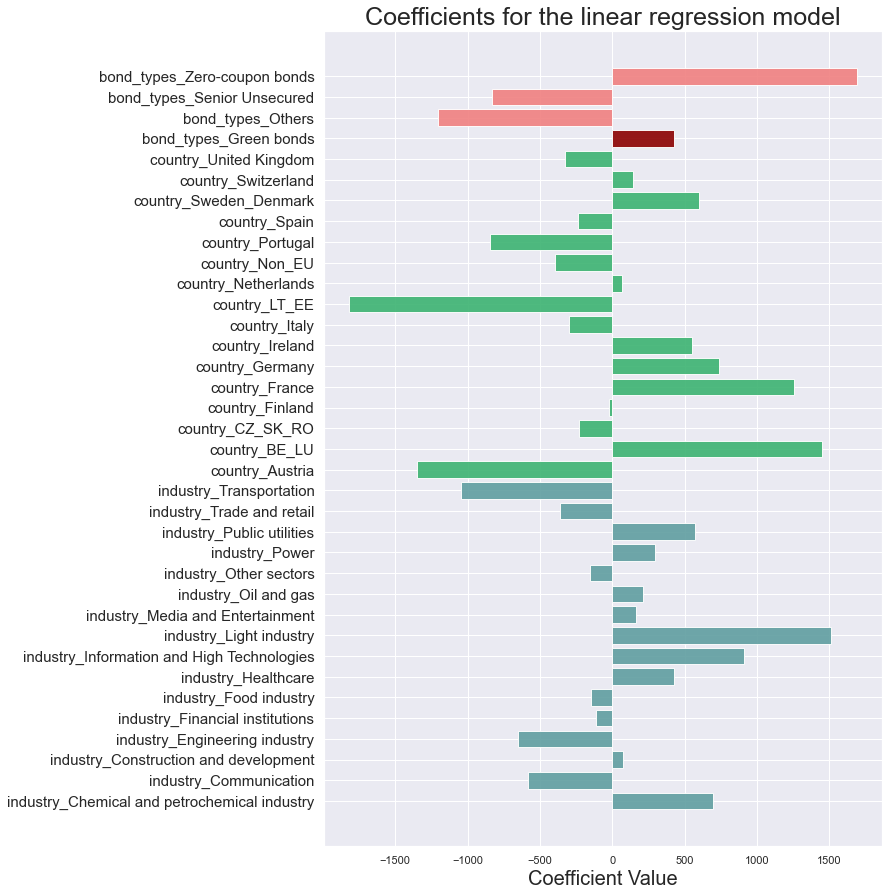

In [144]:
fig, ax = plt.subplots(1,1,sharex=True,figsize=(10,15))
y_pos = np.arange(len(X.columns))

#Lasso Regression
hedge_Lasso = lasso_model.coef_
ax.barh(y=y_pos, width=hedge_Lasso, align='center', alpha=0.9,
        color=["cadetblue"]*16+['mediumseagreen']*16+["darkred"]+["lightcoral"]*3)
ax.set_yticks(y_pos)
plt.yticks(size=15)
ax.set_yticklabels(X.columns)
ax.set_xlabel('Coefficient Value', size=20)
ax.set_title('Coefficients for the linear regression model', size=25);

The bank does not help at all to bonds bought to a company settled in Lithuania and Estonia. Due to the nature of Zero-coupon bonds plus the assumption we used that banks bought the bond with the same value as the face value, the model says that the bank supports Zero-coupon bonds.

## Impact of the alpha value to the Lasso coefficients

We set our possible alpha values from 0 to 15, because after 15 all coefficients were zero

In [145]:
alpha = np.arange(0,250,0.5)
#alpha

Matrix that will store for each alpha, the coefficients values

In [146]:
weights = np.zeros((len(alpha),len(X.columns)),dtype=float) #matrix of dimensions #alphas x #dummievars
weights.shape

(500, 36)

In [147]:
for i in np.arange(0,len(alpha)):
    lassomodelaux = linear_model.Lasso(fit_intercept=True, alpha=alpha[i],copy_X=True,normalize=False)
    lassomodelaux.fit(X,y)
    weights[i,:]= lassomodelaux.coef_  #matrix defined above starts to be filled up
    

C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8473618716.1423645, tolerance: 1851141.002859805
  positive)


We plot the evolution of the coefficients as the alpha increases

In [148]:
ab = itertools.chain(["cadetblue"]*16+['mediumseagreen']*16+["darkred"]+["lightcoral"]*3)
colorlist=list(ab)

In [149]:
ab=itertools.chain([3]*20+[7]*2+[3]*4+[3]*6+[7]+[3]*1+[7]*2)
sizelist=list(ab)

In [150]:
labelsaux=['Chem/Petro','Commun.', 'Construction','Engineering', 'Financial','Food', 'Healthсare',
       'Technology', 'Light','Entertainment', 'Oil/Gas',' Others', 'Power', 'Public utilities',
       'Trade', 'Trans.','AT', 'BE-LU', 'CZ-SK-RO','FI', 'FR', 'DE','IE', 'IT', 'LT-EE', 'NL', 'Non-EU',
       'PT', 'ES', 'SE-DK','CH', 'UK','Green bonds', 'Others','Sr. Unsec.', 'Zero-coup.']

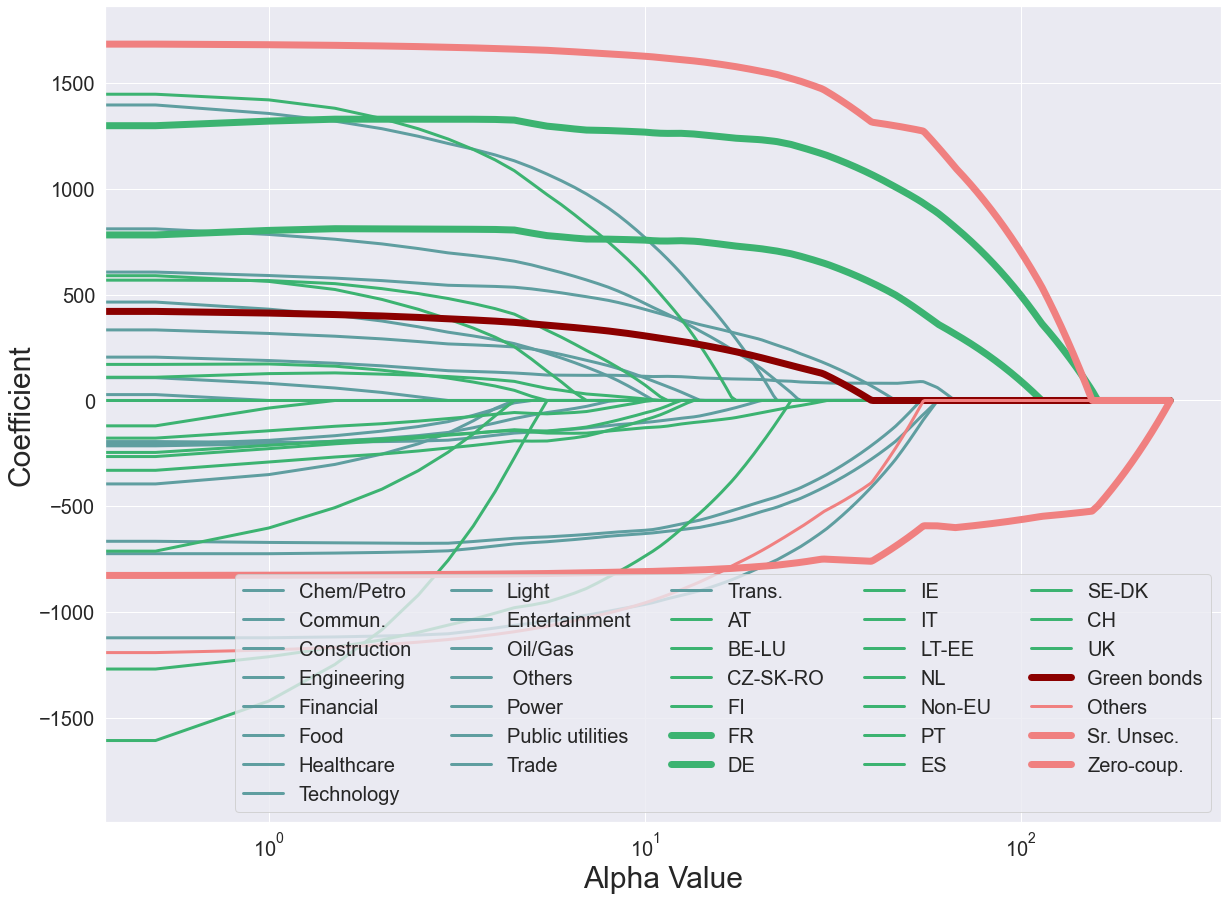

In [151]:
plt.figure(figsize=(20,15))    
for i in np.arange(0,len(X.columns)):
    plt.semilogx(alpha[:],weights[:,i],label=labelsaux[i], linewidth=sizelist[i],
                 color=colorlist[i]) #semilog to make right values closer

plt.xlabel('Alpha Value',size=30)
plt.ylabel('Coefficient',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc="lower right", ncol=5,fontsize=20);

The green bonds seem to shrink to zero slower than most of the variables, but still is not part of the group variables that lasted the most.

The coefficients that survive the most are the ones related to Zero-coupon and Senior Unsecured bonds, as well as Germany and France

## Cross validation for hyperparameter tuning and model selection

In [157]:
alpha[:10]

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [153]:
# use cross validation using 10 Fold cross validation
Lasso=linear_model.LassoCV(alphas=alpha,fit_intercept=True,normalize=False,cv=10)
Lasso.fit(X,y)

C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7901759503.714626, tolerance: 1721422.776125239
  tol, rng, random, positive)
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Home\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7667806396.466984, tolerance: 1702975.1224775836
  tol, rng, random, positive)
C:\Home\Anaconda3\lib\s

LassoCV(alphas=array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38...
       216. , 216.5, 217. , 217.5, 218. , 218.5, 219. , 219.5, 220. ,
       220.5, 221. , 221.5, 222. , 222.5, 223. , 223.5, 224. , 224.5,
       225. , 225.5, 226. , 226.5, 227. , 227.5, 228. , 228.5, 229. ,
       229.5, 230. , 230.5, 231. , 231.5, 232. , 232.5, 233. , 233.5,
       234. , 234.5, 235. , 235.5, 236. , 236.5, 237. , 237.5, 238. ,
       238.5, 239. , 239.5

In [154]:
print('Optimal Value for Alpha:{v:0.4f}'.format(v=Lasso.alpha_))
print('\n')
print('Lasso coefficients: ')
print(Lasso.coef_)
print('\n')
print('Lasso intercept:')
print(Lasso.intercept_)

Optimal Value for Alpha:30.0000


Lasso coefficients: 
[ 177.9139491  -356.7098068     0.         -410.04138548   -0.
   -0.            0.            0.            0.           -0.
   -0.           -0.           82.99186924    0.           -0.
 -614.83908712   -0.            0.           -0.           -0.
 1163.09317134  648.73107528    0.           -2.83247562   -0.
    0.           -0.           -0.           -0.            0.
    0.           -0.          124.34749203 -524.01676558 -749.75496853
 1468.16527042]


Lasso intercept:
691.394432126583


The alpha that decreases the loss function the most is 30

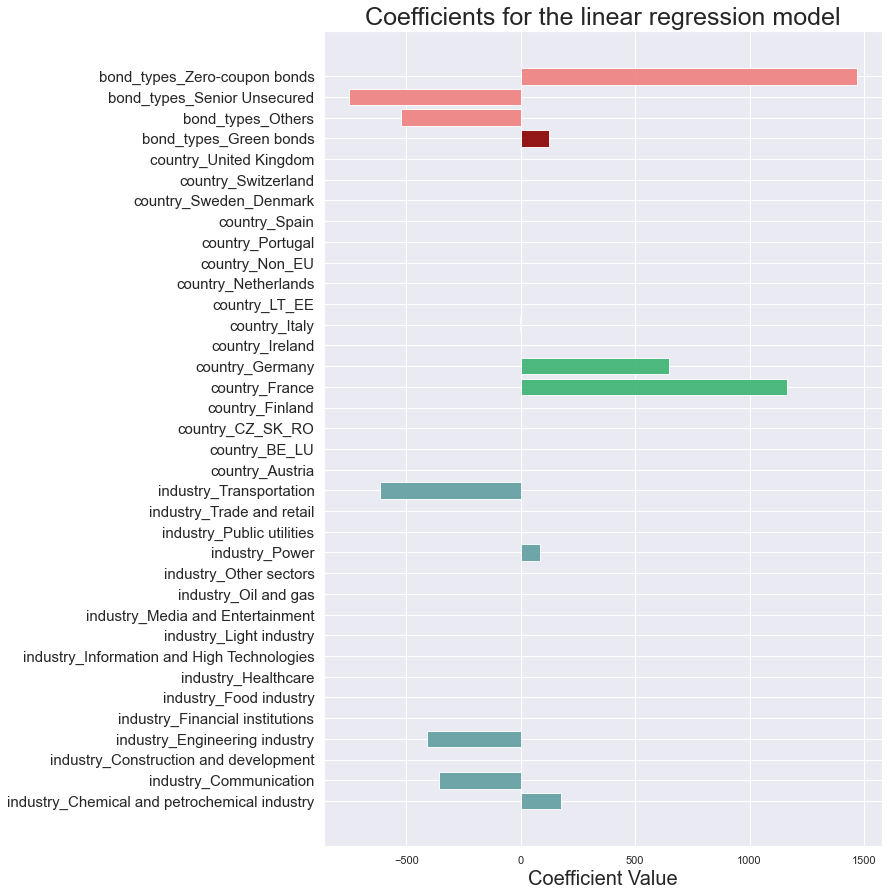

In [155]:
Lasso_Coeffs, ax = plt.subplots(1,1,sharex=True,figsize=(10,15))
y_pos = np.arange(len(X.columns))

#Lasso Regression
hedge_Lasso = Lasso.coef_
ax.barh(y=y_pos, width=hedge_Lasso, align='center', alpha=0.9,
        color=["cadetblue"]*16+['mediumseagreen']*16+["darkred"]+["lightcoral"]*3)
ax.set_yticks(y_pos)
plt.yticks(size=15)
ax.set_yticklabels(X.columns)
ax.set_xlabel('Coefficient Value', size=20)
ax.set_title('Coefficients for the linear regression model', size=25);

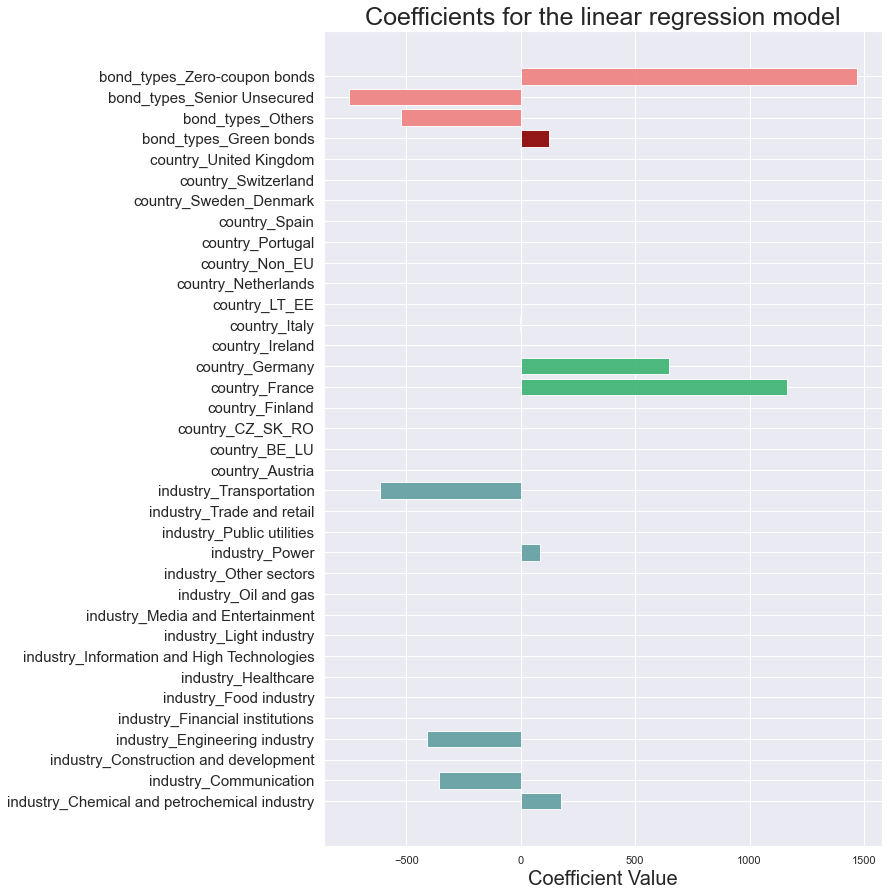

In [158]:
Lasso_Coeffs

In [156]:
ResultingDf=pd.DataFrame(data={"Dummy_variable":X.columns,"Coefficient":np.round(Lasso.coef_,2),"N_bonds":X.sum()})
ResultingDf=ResultingDf.reset_index()[["Dummy_variable","Coefficient","N_bonds"]]
ResultingDf.sort_values(by="Coefficient", ascending=False)

Dummy_variable  Coefficient  N_bonds
35                  bond_types_Zero-coupon bonds      1468.17       86
20                                country_France      1163.09      145
21                               country_Germany       648.73      317
0   industry_Chemical and petrochemical industry       177.91       83
32                        bond_types_Green bonds       124.35      117
12                                industry_Power        82.99      182
4                industry_Financial institutions        -0.00      115
19                               country_Finland        -0.00       31
31                        country_United Kingdom        -0.00       69
30                           country_Switzerland         0.00       67
29                        country_Sweden_Denmark         0.00       14
28                                 country_Spain        -0.00      121
27                              country_Portugal        -0.00        8
26                                country_Non_EU        -0.00       53
25                           country_Netherlands         0.00      168
24                                 country_LT_EE        -0.00        4
22                               country_Ireland         0.00       25
2          industry_Construction and development         0.00      119
5                         industry_Food industry        -0.00       63
18                              country_CZ_SK_RO        -0.00       11
17                                 country_BE_LU         0.00       17
16                               country_Austria        -0.00       25
14                     industry_Trade and retail        -0.00       11
13                     industry_Public utilities         0.00       34
11                        industry_Other sectors        -0.00       45
10                          industry_Oil and gas        -0.00      107
9               industry_Media and Entertainment        -0.00       13
8                        industry_Light industry         0.00       20
7     industry_Information and High Technologies         0.00       40
6                            industry_Healthсare         0.00       48
23                                 country_Italy        -2.83      131
1                         industry_Communication      -356.71      102
3                  industry_Engineering industry      -410.04      145
33                             bond_types_Others      -524.02       81
15                       industry_Transportation      -614.84       79
34                   bond_types_Senior Unsecured      -749.75      922

# Conclussions

<b>Conclussion: Yes, the European Central bank has been supporting the green economy when purchasing corporate
bonds, although it is not the main priority for the bank to support.</b>

Normally the bonds that are supported the most are the ones whose company is located in "France" and "Germany", as well as the "Zero-coupon" bonds.

The big coefficient for the Zero coupon bonds can be explain more than the decision of the bank to support those types of bonds, because of the way we created our outcome variable. Since we were not able to find the exact price at which the bank bought the bond, we used the face value as the price. Due to the nature of Zero-coupon bonds of not giving any interest, this bonds are usually bought at a smaller price than the face value. Thats why simply by construction of our model, the surplus for Zero-coupon bonds will be high.

But the Zero-coupon bonds only account for the 7% percent of the analyzed bonds. Regarding the other types of bonds (93% of the total), all three coefficients were non-zero, but the one associated to green-bonds is positive (beta=127) whereas the other two are negative and big (beta= -750 and -524). Since the difference between the coefficients of green-bonds and the other two is very big, we can conclude that the ECB is supporting more the green-bonds than the other two types of bonds.


Furthermore, we saw in the correspondence analysis that the industry "Power" was very related to green bonds. In this model, the coefficient "Power" although small, is positive (beta=83), so these corroborates again the conclussion that the European Central Bank is supporting the green economy.

We also see that the fact of the green bond coefficient being zero could not be entirely due to the small number of green bonds, since we see that 5 of the other 11 non-zero coefficients are related to variables whose number of bonds belonging to is lower than the ones for green bonds.

# Study limitations

Although helpful, this analysis is not perfect since we made some assumptions beforehand. Some of the assumptions we made were:

* <b>Fixed inflation rate</b>

For calculating the present value of the contributions of the company to the ECB, we considered a fixed inflation rate.

* <b>Cost bond equal to the face value</b>

Given the fact that we were not able to find the exact cost at which the ECB bought the bonds, we were forced to use the face value of a bond as its price. This will not be realistic to happen for Zero-coupon bonds.



Additionally, for calculating the present value of the interest and face value, we did not considered the exact date at which the bonds were issued or matured, we only the year of those dates.
